In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [15]:
df = read_merged().reset_index()
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [16]:
df.pivot(index="date", columns="country", values="inflation")

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# 2. AR model per country

In [17]:
model = FourQuarterAverageModel()
model

In [18]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [48]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


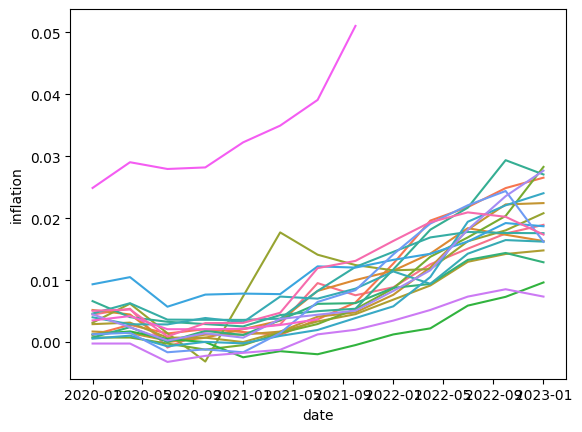

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [50]:
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [51]:
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


In [52]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
160,2022-01-01,Australia,0.008847,0.021295
161,2022-01-01,Belgium,0.012674,0.033275
162,2022-01-01,Canada,0.011531,0.020211
163,2022-01-01,Denmark,0.007637,0.021536
164,2022-01-01,France,0.006854,0.014870
...,...,...,...,...
255,2023-01-01,Sweden,0.027675,0.014955
256,2023-01-01,Switzerland,0.007345,0.010084
257,2023-01-01,Türkiye,NaN,NaN
258,2023-01-01,United Kingdom,NaN,NaN


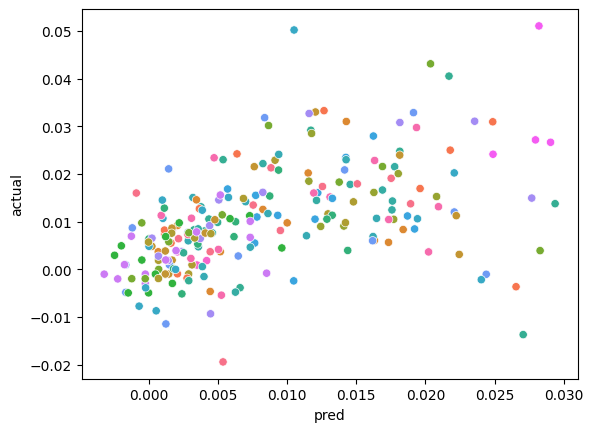

In [53]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [54]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     79.93
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.20e-16
Time:                        13:44:37   Log-Likelihood:                 768.80
No. Observations:                 236   AIC:                            -1534.
Df Residuals:                     234   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.001      4.993      0.000       0.003       0.006
pred           0.6906      0.077      8.940      0.000       0.538       0.843
==============================================================================
Omnibus:                       16.994   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.540
Skew:                           0.143   Prob(JB):                     1.75e-11
Kurtosis:                       5.226   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit()

ImportError: cannot import name 'TimeSeriesSplit' from 'seminartools.time_series_split' (/home/maurits/private/seminar/seminartools/time_series_split.py)